In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('sf_oct.csv')

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20191014170858,2019-10-14,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,f,f,moderate,f,f,1,1,0,0,1.74
1,3850,https://www.airbnb.com/rooms/3850,20191014170858,2019-10-14,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.28
2,5858,https://www.airbnb.com/rooms/5858,20191014170858,2019-10-14,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.87
3,7918,https://www.airbnb.com/rooms/7918,20191014170858,2019-10-14,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8142,https://www.airbnb.com/rooms/8142,20191014170858,2019-10-14,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.13


Description of each column:
- **experiences_offered** - slightly unclear as it does not appear to directly relate to Airbnb - Experiences, but this seems to be the main recommended category of travel type, e.g. business  
    
- **host_since** - date that the host first joined Airbnb
- **host_response_time** - average amount of time the host takes to reply to messages
- **host_response_rate** - proportion of messages that the host replies to
- **host_is_superhost** - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
- **host_listings_count** - how many listings the host has in total
- **host_identity_verified** - whether or not the host has been verified with id
- **neighbourhood_cleansed** - the London borough the property is in
- **property_type** - type of property, e.g. house or flat
- **room_type** - type of listing, e.g. entire home, private room or shared room
- **accommodates** - how many people the property accommodates
- **bathrooms** - number of bathrooms
- **bedrooms** - number of bedrooms
- **beds** - number of beds
- **bed_type** - type of bed, e.g. real bed or sofa-bed
- **amenities** - list of amenities
- **price** - nightly advertised price (the target variable)
- **security_deposit** - the amount required as a security deposit
- **cleaning_fee** - the amount of the cleaning fee (a fixed amount paid per booking)
- **guests_included** - the number of guests included in the booking fee
- **extra_people** - the price per additional guest above the guests_included price
- **minimum_nights** - the minimum length of stay
- **maximum_nights** - the maximum length of stay
- **calendar_updated** - when the host last updated the calendar
- **availability_30** - how many nights are available to be booked in the next 30 days
- **availability_60** - how many nights are available to be booked in the next 60 days
- **availability_90** - how many nights are available to be booked in the next 90 days
- **availability_365** - how many nights are available to be booked in the next 365 days
- **number_of_reviews** - the number of reviews left for the property
- **number_of_reviews_ltm** - the number of reviews left for the property in the last twelve months
- **first_review** - the date of the first review
- **last_review** - the date of the most recent review
- **review_scores_rating** - guests can score properties overall from 1 to 5 stars
- **review_scores_accuracy** - guests can score the accuracy of a property's description from 1 to 5 stars
- **review_scores_cleanliness** - guests can score a property's cleanliness from 1 to 5 stars
- **review_scores_checkin** - guests can score their check-in from 1 to 5 stars
- **review_scores_communication** - guests can score a host's communication from 1 to 5 stars
- **review_scores_location** - guests can score a property's location from 1 to 5 stars
- **review_scores_value** - guests can score a booking's value for money from 1 to 5 stars
- **instant_bookable** - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
- **cancellation_policy** - the type of cancellation policy, e.g. strict or moderate
- **reviews_per_month** - calculated field of the average number of reviews left by guest each month

In [5]:
df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [6]:
l = ['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

df[l]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,97.0,10.0,10.0,10.0,10.0,10.0,9.0
1,94.0,10.0,10.0,10.0,10.0,10.0,10.0
2,98.0,10.0,10.0,10.0,10.0,10.0,9.0
3,86.0,8.0,8.0,9.0,9.0,9.0,8.0
4,93.0,9.0,9.0,10.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...
8106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8109,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.iloc[:,91:].head()

,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,1,0,0,1.74
1,10.0,10.0,t,STR-0000346,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.28
2,10.0,9.0,t,NaN,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.87
3,9.0,8.0,t,NaN,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,9.0,9.0,t,NaN,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.13


In [8]:
selected_cols = ['listing_url', 'id', 'name', 'description', 'neighborhood_overview', 'notes',
                 'transit', 'house_rules', 'host_response_time', 'host_response_rate',
                 'host_is_superhost', 'host_neighbourhood', 'neighbourhood_cleansed',
                 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
                 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 
                 'security_deposit', 'guests_included',
                 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
                 'availability_30', 'availability_365', 'has_availability', 'number_of_reviews',
                 'number_of_reviews_ltm', 'last_scraped', 'last_review', 'review_scores_rating', 
                 'review_scores_accuracy', 'review_scores_cleanliness', 
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                 'review_scores_value', 'reviews_per_month'
                ]
  

In [9]:
df = df[selected_cols]
text_df = df.iloc[:,1:8]  #text based dataframe for NLP purposes
df.drop(df.columns[2:8],axis=1, inplace=True) #drop text columns

In [10]:
text_df.head()

,id,name,description,neighborhood_overview,notes,transit,house_rules
0,958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,* No Pets - even visiting guests for a short t...
1,3850,Charming room for two,Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",House Rule footnotes: 1.\tI don’t allow check ...,Public transit service to my house is outstand...,Airbnb has no default house rules that hosts c...
2,5858,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Please respect the house, the art work, the fu..."
3,7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",Wi-Fi signal in common areas. Large eat in k...,N Juda Muni and bus stop. Street parking.,"No party, No smoking, not for any kinds of smo..."
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,Wi-Fi signal in common areas. Large eat in k...,"N Juda Muni, Bus and UCSF Shuttle. small shopp...",no pet no smoke no party inside the building


## Filter Inactive Listings

Hosts should be modeling their price on highly available and active listings that tend to be booked frequently. As a result, we probably don't want to look at listings that haven't been reviewed in the last 6 months. Looking at the distribution below shows a good chunk of listings that are active.

In [11]:
df['last_scraped']

0       2019-10-14
1       2019-10-14
2       2019-10-14
3       2019-10-14
4       2019-10-14
           ...    
8106    2019-10-14
8107    2019-10-14
8108    2019-10-14
8109    2019-10-14
8110    2019-10-14
Name: last_scraped, Length: 8111, dtype: object

In [12]:
df['last_scraped'] = pd.to_datetime(df['last_scraped'], format="%Y-%m-%d")
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y-%m-%d")
df['since_last_review'] = df['last_scraped'] - df['last_review']  #number of days since this listing was last reviewed
df = df[df['since_last_review'].notna()]
df['since_last_review'] = df['since_last_review'].dt.days

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


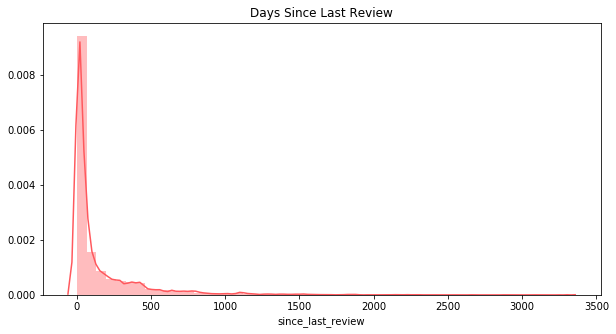

In [13]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.distplot(df['since_last_review'], color='#FF585D')
ax.set_title('Days Since Last Review');

In [14]:
df = df[df['since_last_review'] < 183]  #filter out listings so that we only get active listings (reviewed in last 6 months)

## Filtering Listings

For the sake of this project, I'd like to focus on maximizing revenue for an active AirBnB host. However, its important to keep in mind the concept of **high availability**. InsideAirBnB defines a listing as **highly available** if it has been rented in the last 6 months and if it is being rented regularly. Lets look at the distribution of availability below first.

**Revenue = Average length of stay * Price * No. of reviews/month * Review Rate**

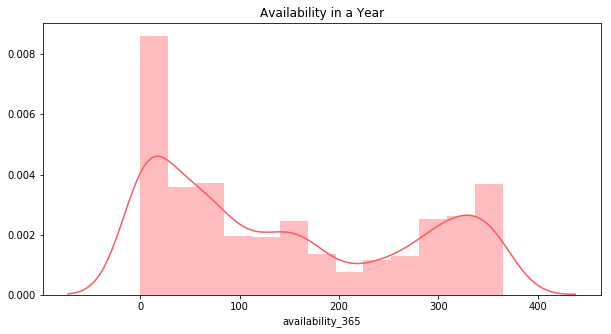

In [15]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.distplot(df['availability_365'], color='#FF585D')
ax.set_title('Availability in a Year');

In [16]:
df[df['availability_365'] == 0]

,listing_url,id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,since_last_review
23,https://www.airbnb.com/rooms/23630,23630,within a few hours,100%,t,The Castro,Castro/Upper Market,37.75963,-122.44143,House,...,2019-10-08,97.0,10.0,10.0,10.0,10.0,10.0,10.0,3.44,6
42,https://www.airbnb.com/rooms/41055,41055,within a few hours,100%,t,The Castro,Castro/Upper Market,37.76125,-122.43335,House,...,2019-07-24,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0.49,82
113,https://www.airbnb.com/rooms/99094,99094,NaN,NaN,f,Mission District,Mission,37.76809,-122.42439,Apartment,...,2019-10-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,20.99,2
143,https://www.airbnb.com/rooms/148769,148769,within an hour,100%,f,Diamond Heights,Twin Peaks,37.75195,-122.44928,Apartment,...,2019-10-01,82.0,8.0,8.0,9.0,9.0,9.0,8.0,1.87,13
159,https://www.airbnb.com/rooms/199480,199480,within an hour,100%,t,Bernal Heights,Bernal Heights,37.74557,-122.41187,Apartment,...,2019-09-22,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.00,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7578,https://www.airbnb.com/rooms/37524923,37524923,within an hour,90%,t,NaN,Haight Ashbury,37.77135,-122.44482,Condominium,...,2019-09-30,96.0,10.0,10.0,10.0,10.0,10.0,9.0,4.62,14
7614,https://www.airbnb.com/rooms/37691579,37691579,within a few hours,100%,f,Russian Hill,Russian Hill,37.79837,-122.42000,Guest suite,...,2019-09-19,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00,25
7686,https://www.airbnb.com/rooms/37973490,37973490,within an hour,100%,f,Richmond District,Inner Richmond,37.77826,-122.45719,Apartment,...,2019-10-04,80.0,7.0,8.0,8.0,8.0,10.0,8.0,4.39,10
7754,https://www.airbnb.com/rooms/38192828,38192828,within a day,100%,f,Bayview,Bayview,37.72598,-122.39688,Condominium,...,2019-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91,32


In [17]:
df[['number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month']]

,number_of_reviews,number_of_reviews_ltm,reviews_per_month
0,217,52,1.74
1,160,36,1.28
3,18,1,0.15
5,28,1,0.23
6,704,87,5.67
...,...,...,...
7998,1,1,1.00
8020,1,1,1.00
8024,1,1,1.00
8042,1,1,1.00


## Removing Outliers

Handling outliers is very important when we want to fit a regression model. Something to keep in mind is how many people a listing can accomodate.For now, I am going to remove extremely large listings such as those than can accomodate more than 10 people. Listing that can accomodate >10 people are a miniority and can skew the regression line.

In [18]:
df['accommodates'].value_counts()

2     2249
4      957
1      456
3      428
6      406
5      226
8      112
7       76
10      27
12      16
9       12
11       8
15       4
14       4
16       2
13       1
Name: accommodates, dtype: int64

In [19]:
df = df[df['accommodates'] < 10]

In [20]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

## Price Processing

Price is our target variable so it would be useful to get a sense of the distribution.

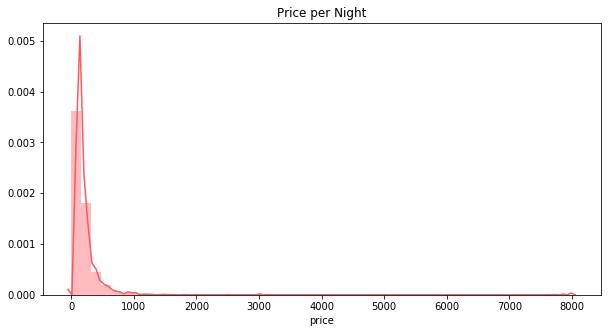

In [21]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.distplot(df['price'], color='#FF585D')
ax.set_title('Price per Night');

In [22]:
df['price'].describe()

count    4922.000000
mean      196.642422
std       221.465956
min         0.000000
25%        99.000000
50%       145.000000
75%       225.000000
max      8000.000000
Name: price, dtype: float64

In [23]:
df['price'].nlargest(30)

2818    8000.0
5627    2999.0
7699    2999.0
7700    2999.0
5218    2998.0
5660    2998.0
5129    2500.0
5380    1995.0
4560    1850.0
635     1800.0
4478    1600.0
2208    1500.0
5671    1500.0
3834    1495.0
3926    1451.0
2502    1395.0
6697    1300.0
1299    1250.0
5519    1249.0
134     1200.0
2021    1200.0
6056    1200.0
6135    1200.0
7074    1198.0
7362    1150.0
5633    1099.0
342     1049.0
1801    1025.0
773     1000.0
1651    1000.0
Name: price, dtype: float64

The price at the 75th percentile is only **225** but it jumps to **8000** as the highest value. Looks like there are some possible outliers and one way to address this is by looking at an IQR plot.

In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Upper bound is:', upper_bound)

Upper bound is: 414.0


In [25]:
df = df[df['price'] < 1000]

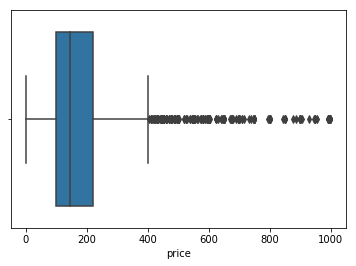

In [26]:
ax = sns.boxplot(df['price'])

There are still some outliers when considering the IQR plot above but I also want to consider people who offer luxury AirBnBs which will naturally have higher prices. As a result, I will just set the upper bound to **1000 dollars** for now.

## Property Filtering

In [27]:
df['property_type'].value_counts()

Apartment             1661
House                 1566
Condominium            530
Guest suite            518
Boutique hotel         104
Townhouse               93
Hotel                   84
Hostel                  73
Loft                    52
Serviced apartment      42
Bed and breakfast       41
Aparthotel              33
Guesthouse              33
Other                   20
Bungalow                12
Cottage                 11
Villa                    5
Resort                   3
Tiny house               2
Earth house              2
Dome house               1
Cabin                    1
In-law                   1
Name: property_type, dtype: int64

In [28]:
def change_other(s):
    changed_properties = ['Bungalow', 'Cottage', 'Villa', 'Resort', 'Tiny house', 
                          'Earth house','Cabin', 'Dome house', 'In-law']
    if s in changed_properties:
        return 'Other'
    else:
        return s

df['property_type'] = df['property_type'].apply(change_other)

In [29]:
df['property_type'].value_counts()

Apartment             1661
House                 1566
Condominium            530
Guest suite            518
Boutique hotel         104
Townhouse               93
Hotel                   84
Hostel                  73
Other                   58
Loft                    52
Serviced apartment      42
Bed and breakfast       41
Guesthouse              33
Aparthotel              33
Name: property_type, dtype: int64

## San Francisco Model

**Estimated Monthly Bookings = (# Of Reviews Per Month / Review Rate)**

**# Of Booked Days Per Month = Avg Length of Stay * Estimated Monthly Bookings**

**Monthly Revenue = # of Booked Days Per Month * Daily Price**

In [30]:
b = np.array([24, 19, 32, 41, 56])
np.minimum(27, b)

array([24, 19, 27, 27, 27])

In [31]:
df = df[df['price'] < 999]

In [32]:
review_rate = 0.5
avg_length_stay = 5.5

monthly_bookings = np.array(df['reviews_per_month'] / review_rate)
booked_days_month = np.minimum(27, avg_length_stay * monthly_bookings)
monthly_revenue = booked_days_month * df['price']
df['monthly_revenue'] = monthly_revenue

In [33]:
df['monthly_revenue'].describe()

count     4878.000000
mean      2812.956474
std       2532.701258
min          0.000000
25%       1001.550000
50%       2295.000000
75%       3780.000000
max      26730.000000
Name: monthly_revenue, dtype: float64

In [34]:
df = df[df['monthly_revenue'] < 20000]

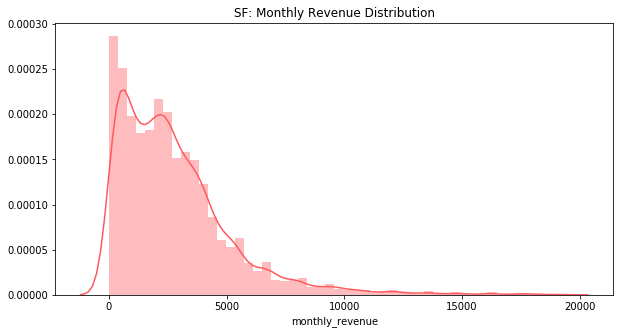

In [35]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.distplot(df['monthly_revenue'], color='#FF585D')
ax.set_title('SF: Monthly Revenue Distribution');

In [36]:
df['monthly_revenue'].nlargest(10)

7105    19143.0
4581    18873.0
3360    18225.0
7559    18198.0
1774    17622.0
6233    17550.0
7163    17550.0
5379    17523.0
6313    17469.0
6788    17010.0
Name: monthly_revenue, dtype: float64

In [37]:
df.loc[7105]

listing_url                                https://www.airbnb.com/rooms/35195369
id                                                                      35195369
host_response_time                                                within an hour
host_response_rate                                                          100%
host_is_superhost                                                              t
host_neighbourhood                                                    The Castro
neighbourhood_cleansed                                       Castro/Upper Market
latitude                                                                 37.7616
longitude                                                               -122.443
property_type                                                              House
room_type                                                        Entire home/apt
accommodates                                                                   8
bathrooms                   

In [38]:
df.isna().sum()

listing_url                      0
id                               0
host_response_time             227
host_response_rate             227
host_is_superhost                8
host_neighbourhood             322
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                       11
bedrooms                         0
beds                             3
bed_type                         0
amenities                        0
price                            0
security_deposit               757
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
calendar_updated                 0
availability_30                  0
availability_365                 0
has_availability                 0
number_of_reviews                0
number_of_reviews_lt

In [39]:
df[df['host_neighbourhood'].isna()]

,listing_url,id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,since_last_review,monthly_revenue
121,https://www.airbnb.com/rooms/114401,114401,NaN,NaN,NaN,NaN,Castro/Upper Market,37.76102,-122.43005,Condominium,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,5.57,2,3375.00
489,https://www.airbnb.com/rooms/905902,905902,within a few hours,80%,f,NaN,Golden Gate Park,37.76569,-122.48264,Apartment,...,92.0,10.0,9.0,10.0,10.0,9.0,9.0,1.05,47,2136.75
564,https://www.airbnb.com/rooms/1109534,1109534,NaN,NaN,f,NaN,Pacific Heights,37.79090,-122.43397,Condominium,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.55,71,3025.00
603,https://www.airbnb.com/rooms/1205031,1205031,within an hour,100%,t,NaN,South of Market,37.77621,-122.39703,Loft,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.35,56,3102.00
732,https://www.airbnb.com/rooms/1565576,1565576,NaN,NaN,t,NaN,South of Market,37.77384,-122.41909,Condominium,...,100.0,10.0,10.0,10.0,10.0,10.0,9.0,0.31,113,511.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,https://www.airbnb.com/rooms/38352342,38352342,within a few hours,100%,f,NaN,Nob Hill,37.79232,-122.42088,Apartment,...,100.0,10.0,8.0,10.0,10.0,10.0,10.0,1.00,8,4400.00
7855,https://www.airbnb.com/rooms/38584753,38584753,within a few hours,100%,f,NaN,Outer Mission,37.73379,-122.45201,Guest suite,...,100.0,9.0,10.0,10.0,10.0,10.0,9.0,3.00,6,3510.00
7870,https://www.airbnb.com/rooms/38624328,38624328,within a few hours,100%,f,NaN,Bernal Heights,37.74094,-122.42173,Condominium,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00,1,2299.00
7916,https://www.airbnb.com/rooms/38794038,38794038,within an hour,100%,f,NaN,Outer Mission,37.72393,-122.43943,Guest suite,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3.00,1,2700.00


In [40]:
df['host_neighbourhood'].unique()

array(['Duboce Triangle', 'Inner Sunset', 'Cole Valley', 'Alamo Square',
       'Mission District', 'Potrero Hill', 'Lower Haight', 'The Castro',
       'Noe Valley', 'Western Addition/NOPA', 'Glen Park',
       'Bernal Heights', 'Richmond District', 'Presidio Heights',
       'Ingleside', 'Pacific Heights', 'Financial District', 'Downtown',
       'Russian Hill', 'Marina', 'Excelsior', 'Chinatown',
       'Haight-Ashbury', 'Outer Sunset', 'Tenderloin', 'Balboa Terrace',
       'Bayview', nan, 'Telegraph Hill', 'Diamond Heights', 'West Portal',
       'North Beach', 'Mission Terrace', 'SoMa', 'Dogpatch', 'Sunnyside',
       'Oceanview', 'Parkside', 'Nob Hill', 'Western Addition',
       'Lakeshore', "Fisherman's Wharf", 'South Beach', 'Cow Hollow',
       'Crocker Amazon', 'Hayes Valley', 'Cannes', 'Twin Peaks',
       'Portola', 'Civic Center', 'Union Square', 'Presidio', 'Truckee',
       'Alpine Meadows/Squaw Valley', 'Forest Hill', 'Waikiki',
       'Visitacion Valley', 'Palo Alto'

In [41]:
df['host_response_time'].fillna('Unknown', inplace=True)

In [42]:
def get_num_amenities(s):
    return len(s.split(','))

df['num_amenities'] = df['amenities'].apply(get_num_amenities)

In [2]:
df.head()

NameError: name 'df' is not defined

In [1]:
df.loc[df['amenities'].str.contains('24-hour check-in')]

NameError: name 'df' is not defined